# Setup

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.6/235.7 GB disk)


# Download Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API Key")
project = rf.workspace("bayazid").project("luggage-detection-0uesk")
version = project.version(1)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to luggage-detection-1 in yolov8-obb:: 100%|██████████| 8794/8794 [00:01<00:00, 7814.48it/s]


# Train on Yolov8n

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  
results = model.train(data='/content/luggage-detection-1/data.yaml', epochs=100)  
results = model.val()

100%|██████████| 6.25M/6.25M [00:00<00:00, 308MB/s]

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/luggage-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/luggage-detection-1/train/labels... 4053 images, 249 backgrounds, 0 corrupt: 100%|██████████| 4053/4053 [00:03<00:00, 1062.26it/s]


train: New cache created: /content/luggage-detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/luggage-detection-1/valid/labels... 169 images, 13 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<00:00, 866.67it/s]


val: New cache created: /content/luggage-detection-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.28G      1.283      2.753      1.627         18        640: 100%|██████████| 254/254 [00:29<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        169        253      0.584      0.355      0.365       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.2G      1.286      2.086      1.587         18        640: 100%|██████████| 254/254 [00:25<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]


                   all        169        253       0.28      0.393      0.304      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.19G      1.288      1.914       1.58         15        640: 100%|██████████| 254/254 [00:25<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.62it/s]

                   all        169        253      0.388      0.575      0.462      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.2G      1.266      1.814      1.566         22        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.42it/s]


                   all        169        253      0.571      0.449      0.519      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.14G      1.216      1.691       1.53         28        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]


                   all        169        253      0.569      0.425      0.487      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.2G      1.194      1.599      1.508         38        640: 100%|██████████| 254/254 [00:25<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.34it/s]


                   all        169        253      0.445      0.599      0.536      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.19G      1.194      1.574      1.511         16        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.83it/s]


                   all        169        253      0.554      0.569      0.566      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.2G      1.169      1.531      1.489         20        640: 100%|██████████| 254/254 [00:24<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]


                   all        169        253      0.523      0.603      0.556      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.2G      1.152      1.484      1.484         28        640: 100%|██████████| 254/254 [00:25<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.79it/s]


                   all        169        253      0.728      0.555      0.637      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.16G      1.129      1.415       1.46         25        640: 100%|██████████| 254/254 [00:25<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.79it/s]


                   all        169        253       0.53      0.697      0.636      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.26G      1.121      1.408      1.453         24        640: 100%|██████████| 254/254 [00:24<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.65it/s]

                   all        169        253      0.549      0.577      0.539      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.2G      1.109      1.356      1.441         20        640: 100%|██████████| 254/254 [00:25<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]

                   all        169        253      0.587      0.664      0.648      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.12G      1.089      1.318      1.431         25        640: 100%|██████████| 254/254 [00:25<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]

                   all        169        253      0.701      0.555      0.618      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.17G      1.096      1.294      1.426         19        640: 100%|██████████| 254/254 [00:24<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.78it/s]


                   all        169        253      0.568      0.621      0.576      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.2G      1.079      1.259      1.421         16        640: 100%|██████████| 254/254 [00:24<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]

                   all        169        253      0.627      0.625      0.619       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.15G      1.083      1.241      1.421         17        640: 100%|██████████| 254/254 [00:25<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.82it/s]


                   all        169        253      0.625      0.671       0.66      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.19G       1.06      1.221      1.406         11        640: 100%|██████████| 254/254 [00:24<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]


                   all        169        253      0.722      0.653      0.708      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.21G      1.057      1.206      1.405         18        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.90it/s]

                   all        169        253      0.651      0.623      0.667      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.2G      1.046      1.172      1.389         30        640: 100%|██████████| 254/254 [00:24<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.95it/s]


                   all        169        253      0.644       0.65      0.665      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.2G      1.042       1.16      1.394         24        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]

                   all        169        253      0.625      0.698      0.676      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.19G      1.045      1.178      1.391         25        640: 100%|██████████| 254/254 [00:24<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]


                   all        169        253      0.654      0.706       0.72      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.22G      1.027      1.156      1.378         23        640: 100%|██████████| 254/254 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]


                   all        169        253      0.723      0.629      0.688      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.2G      1.017       1.12      1.372         19        640: 100%|██████████| 254/254 [00:25<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.68it/s]


                   all        169        253      0.756      0.621      0.708      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.15G      1.016      1.103      1.367         31        640: 100%|██████████| 254/254 [00:24<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]

                   all        169        253      0.676      0.724      0.729      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.18G      1.019      1.096      1.364         23        640: 100%|██████████| 254/254 [00:25<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]

                   all        169        253      0.669      0.716      0.721      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.21G      1.014      1.083      1.366         19        640: 100%|██████████| 254/254 [00:25<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]


                   all        169        253      0.728      0.754      0.772      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.15G      1.001      1.066      1.355         33        640: 100%|██████████| 254/254 [00:24<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.78it/s]

                   all        169        253      0.776      0.705      0.756      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.18G     0.9967      1.053      1.349         29        640: 100%|██████████| 254/254 [00:24<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]


                   all        169        253      0.725      0.658      0.711      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.19G     0.9849      1.043      1.342         12        640: 100%|██████████| 254/254 [00:24<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.10it/s]

                   all        169        253      0.668      0.664      0.706      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.18G     0.9796      1.043      1.342         13        640: 100%|██████████| 254/254 [00:24<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.66it/s]

                   all        169        253      0.772      0.711      0.753      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.2G     0.9839      1.035      1.344         23        640: 100%|██████████| 254/254 [00:24<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]

                   all        169        253        0.7      0.662      0.694      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.18G     0.9665      1.011      1.335         23        640: 100%|██████████| 254/254 [00:25<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]


                   all        169        253      0.776      0.659      0.761      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.14G     0.9581     0.9911      1.324         27        640: 100%|██████████| 254/254 [00:24<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]


                   all        169        253      0.773       0.63      0.698      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.16G     0.9528     0.9949      1.319         21        640: 100%|██████████| 254/254 [00:24<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]

                   all        169        253      0.776      0.667      0.736      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.15G     0.9583     0.9754      1.325         13        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.17it/s]


                   all        169        253      0.668      0.722      0.727      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.21G     0.9558     0.9615      1.319         19        640: 100%|██████████| 254/254 [00:25<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]

                   all        169        253      0.766      0.701      0.747      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.21G     0.9551     0.9664      1.324         24        640: 100%|██████████| 254/254 [00:24<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]

                   all        169        253       0.75      0.683      0.725      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.2G     0.9497     0.9472      1.314         22        640: 100%|██████████| 254/254 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.74it/s]

                   all        169        253      0.678      0.713      0.721      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.2G     0.9508     0.9459      1.324         19        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]

                   all        169        253      0.778      0.701       0.77      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.21G     0.9446     0.9425      1.322         17        640: 100%|██████████| 254/254 [00:24<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.76it/s]

                   all        169        253      0.752      0.664      0.724      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.19G     0.9395     0.9429      1.312         18        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]


                   all        169        253      0.763      0.662      0.716       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.19G     0.9218     0.9159      1.299         19        640: 100%|██████████| 254/254 [00:24<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]


                   all        169        253      0.692      0.738      0.752      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.13G     0.9217     0.9159      1.299         21        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]

                   all        169        253      0.768      0.656      0.736      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.16G     0.9316      0.937      1.304         17        640: 100%|██████████| 254/254 [00:24<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]


                   all        169        253      0.667      0.769      0.777        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.15G     0.9196     0.8923      1.297         23        640: 100%|██████████| 254/254 [00:25<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.87it/s]

                   all        169        253      0.749      0.692      0.708      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.2G     0.9067     0.8904      1.289         22        640: 100%|██████████| 254/254 [00:24<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.63it/s]

                   all        169        253      0.685      0.713      0.721      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.2G     0.9076     0.8881      1.288         15        640: 100%|██████████| 254/254 [00:24<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]

                   all        169        253      0.681      0.783      0.764      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.18G     0.9134     0.8893      1.292         19        640: 100%|██████████| 254/254 [00:25<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.67it/s]

                   all        169        253      0.788      0.694       0.72      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.14G     0.9068     0.8821      1.286         20        640: 100%|██████████| 254/254 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]


                   all        169        253        0.8      0.682      0.746      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.29G     0.8964     0.8728      1.278         19        640: 100%|██████████| 254/254 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.25it/s]

                   all        169        253      0.765      0.695      0.734      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.19G     0.8919     0.8659      1.274         32        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.68it/s]

                   all        169        253       0.78      0.673      0.753      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.24G     0.8926     0.8631      1.276         25        640: 100%|██████████| 254/254 [00:25<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.95it/s]

                   all        169        253      0.674        0.8      0.764      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.19G     0.8934     0.8613      1.281         16        640: 100%|██████████| 254/254 [00:24<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.30it/s]

                   all        169        253      0.748      0.754      0.752      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.18G     0.8842     0.8384      1.271         18        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.29it/s]

                   all        169        253      0.813      0.648      0.735        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.14G     0.8833     0.8468      1.268         17        640: 100%|██████████| 254/254 [00:24<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]

                   all        169        253      0.744      0.751      0.778      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.15G      0.857     0.8233      1.257         12        640: 100%|██████████| 254/254 [00:24<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.82it/s]


                   all        169        253      0.736      0.723      0.742      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.15G     0.8577     0.8074      1.252         24        640: 100%|██████████| 254/254 [00:25<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]

                   all        169        253      0.765      0.699      0.755      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.8679       0.82      1.262         18        640: 100%|██████████| 254/254 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.52it/s]

                   all        169        253      0.734      0.686      0.736      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.17G     0.8685     0.8247      1.261         28        640: 100%|██████████| 254/254 [00:24<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]

                   all        169        253      0.726      0.771      0.756        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.16G     0.8668      0.811      1.259         18        640: 100%|██████████| 254/254 [00:24<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]

                   all        169        253      0.781      0.735      0.777      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.19G     0.8591      0.811      1.261         19        640: 100%|██████████| 254/254 [00:24<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]


                   all        169        253      0.811      0.659      0.742      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.18G      0.841     0.7997      1.246         24        640: 100%|██████████| 254/254 [00:24<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.05it/s]

                   all        169        253      0.813      0.698       0.77      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.18G     0.8401     0.7745       1.24         17        640: 100%|██████████| 254/254 [00:24<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]

                   all        169        253      0.788      0.631      0.735      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.25G     0.8425     0.7771      1.236         20        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.54it/s]

                   all        169        253      0.846      0.637      0.759      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.18G     0.8468     0.7889      1.244         16        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.15it/s]

                   all        169        253      0.733      0.687      0.712      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.2G     0.8329     0.7742      1.237          6        640: 100%|██████████| 254/254 [00:24<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]


                   all        169        253      0.819      0.683      0.774      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.19G     0.8313     0.7721      1.238         22        640: 100%|██████████| 254/254 [00:24<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]

                   all        169        253      0.814      0.723      0.748      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.17G     0.8328     0.7686      1.236         18        640: 100%|██████████| 254/254 [00:24<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]


                   all        169        253      0.803      0.689      0.735      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.15G     0.8204     0.7626      1.224         14        640: 100%|██████████| 254/254 [00:24<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]


                   all        169        253      0.827       0.68      0.739      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.18G     0.8232     0.7542      1.226         26        640: 100%|██████████| 254/254 [00:25<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]


                   all        169        253      0.762      0.696      0.756      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.19G     0.8138     0.7457      1.223         16        640: 100%|██████████| 254/254 [00:24<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]

                   all        169        253      0.802      0.709      0.766      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.2G     0.8141     0.7507      1.223         14        640: 100%|██████████| 254/254 [00:24<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.98it/s]

                   all        169        253      0.799      0.714      0.765       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.2G     0.8189     0.7482      1.222         27        640: 100%|██████████| 254/254 [00:25<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.36it/s]

                   all        169        253      0.762      0.696      0.746      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.21G      0.801     0.7319      1.217         20        640: 100%|██████████| 254/254 [00:24<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]

                   all        169        253       0.73      0.752      0.752      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.16G     0.8036      0.733      1.215         24        640: 100%|██████████| 254/254 [00:24<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]

                   all        169        253      0.666      0.781      0.746      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.23G     0.8016      0.739      1.213         23        640: 100%|██████████| 254/254 [00:25<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.58it/s]

                   all        169        253      0.786      0.698      0.761      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.15G     0.8006     0.7317      1.211         31        640: 100%|██████████| 254/254 [00:24<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]


                   all        169        253      0.818       0.71      0.744      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.26G     0.8049     0.7349      1.216         21        640: 100%|██████████| 254/254 [00:24<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]

                   all        169        253        0.8      0.702      0.764      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.19G     0.8012     0.7199      1.211         22        640: 100%|██████████| 254/254 [00:24<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.13it/s]

                   all        169        253      0.788      0.712      0.746      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.2G     0.7846     0.7151      1.206         22        640: 100%|██████████| 254/254 [00:25<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.84it/s]

                   all        169        253      0.783       0.72      0.763      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.17G     0.7788     0.7152        1.2         18        640: 100%|██████████| 254/254 [00:24<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]


                   all        169        253      0.778       0.75      0.772      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.2G     0.7905     0.7279      1.207         26        640: 100%|██████████| 254/254 [00:25<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.63it/s]

                   all        169        253      0.801      0.702      0.788      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.2G     0.7797     0.7101      1.202         23        640: 100%|██████████| 254/254 [00:25<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]

                   all        169        253      0.849      0.744      0.805      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.18G     0.7764     0.7099      1.196         30        640: 100%|██████████| 254/254 [00:24<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.74it/s]

                   all        169        253      0.814      0.747      0.786      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.14G     0.7671     0.6879      1.192         17        640: 100%|██████████| 254/254 [00:24<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.51it/s]

                   all        169        253      0.795      0.744      0.788      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.2G     0.7644     0.6986      1.193         15        640: 100%|██████████| 254/254 [00:25<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]

                   all        169        253      0.832      0.691      0.759      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.17G     0.7644     0.6885      1.193         19        640: 100%|██████████| 254/254 [00:24<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.36it/s]

                   all        169        253      0.783      0.732      0.781      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.18G     0.7562     0.6846      1.186         35        640: 100%|██████████| 254/254 [00:24<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.93it/s]

                   all        169        253      0.738      0.739      0.756      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.15G     0.7645     0.6887      1.191         22        640: 100%|██████████| 254/254 [00:25<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]

                   all        169        253      0.751      0.777      0.779      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.2G     0.7596     0.6879      1.186         18        640: 100%|██████████| 254/254 [00:24<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]

                   all        169        253      0.776      0.749      0.773      0.522


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.29G      0.636     0.4363      1.167         10        640: 100%|██████████| 254/254 [00:24<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]

                   all        169        253      0.753      0.745      0.773      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.18G     0.6105     0.3986      1.145         10        640: 100%|██████████| 254/254 [00:24<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]

                   all        169        253      0.802      0.716       0.77      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.17G     0.6079     0.3922      1.142          7        640: 100%|██████████| 254/254 [00:24<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]

                   all        169        253      0.754      0.736       0.76      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.18G     0.6001     0.3873      1.136         10        640: 100%|██████████| 254/254 [00:24<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.32it/s]

                   all        169        253      0.763      0.735      0.767       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.17G     0.5951     0.3788       1.13          6        640: 100%|██████████| 254/254 [00:24<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.76it/s]

                   all        169        253      0.767      0.727      0.769      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.17G     0.5913     0.3716      1.123          4        640: 100%|██████████| 254/254 [00:24<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]

                   all        169        253      0.818      0.698      0.785      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.14G     0.5806     0.3657       1.11          5        640: 100%|██████████| 254/254 [00:24<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]

                   all        169        253      0.816      0.707      0.778      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.15G     0.5787     0.3618      1.119          5        640: 100%|██████████| 254/254 [00:24<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]


                   all        169        253      0.842      0.705      0.776      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.17G     0.5828     0.3663      1.116          5        640: 100%|██████████| 254/254 [00:24<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]


                   all        169        253      0.803      0.707       0.77      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.17G     0.5698     0.3656      1.112          5        640: 100%|██████████| 254/254 [00:24<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.14it/s]

                   all        169        253      0.849      0.679      0.773      0.532



100 epochs completed in 0.733 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]


                   all        169        253      0.854      0.741      0.805      0.543
Irregular-Musical-Instrument-         17         22       0.94      0.714      0.859      0.493
     Irregular-Weapon-          8          8       0.95      0.625      0.783      0.582
    Regular-Cardboard-          9         19          1      0.526      0.812      0.539
 Regular-Hard-Plastic-         45         90       0.79      0.811      0.726      0.543
        Regular-Metal-         35         53       0.76      0.623      0.676      0.427
 Regular-Soft-Plastic-         26         42      0.789      0.889      0.821      0.571
         Regular-Wood-         17         19      0.748          1       0.96      0.644
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GF

val: Scanning /content/luggage-detection-1/valid/labels.cache... 169 images, 13 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.56it/s]


                   all        169        253      0.849      0.745      0.805      0.542
Irregular-Musical-Instrument-         17         22       0.94      0.718      0.862      0.495
     Irregular-Weapon-          8          8      0.938      0.625      0.783      0.582
    Regular-Cardboard-          9         19          1      0.544      0.812      0.531
 Regular-Hard-Plastic-         45         90      0.789      0.811      0.724      0.542
        Regular-Metal-         35         53       0.75      0.624      0.676      0.427
 Regular-Soft-Plastic-         26         42      0.789      0.892       0.82      0.571
         Regular-Wood-         17         19      0.737          1      0.958      0.643
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train2


# Metrics Evaluation

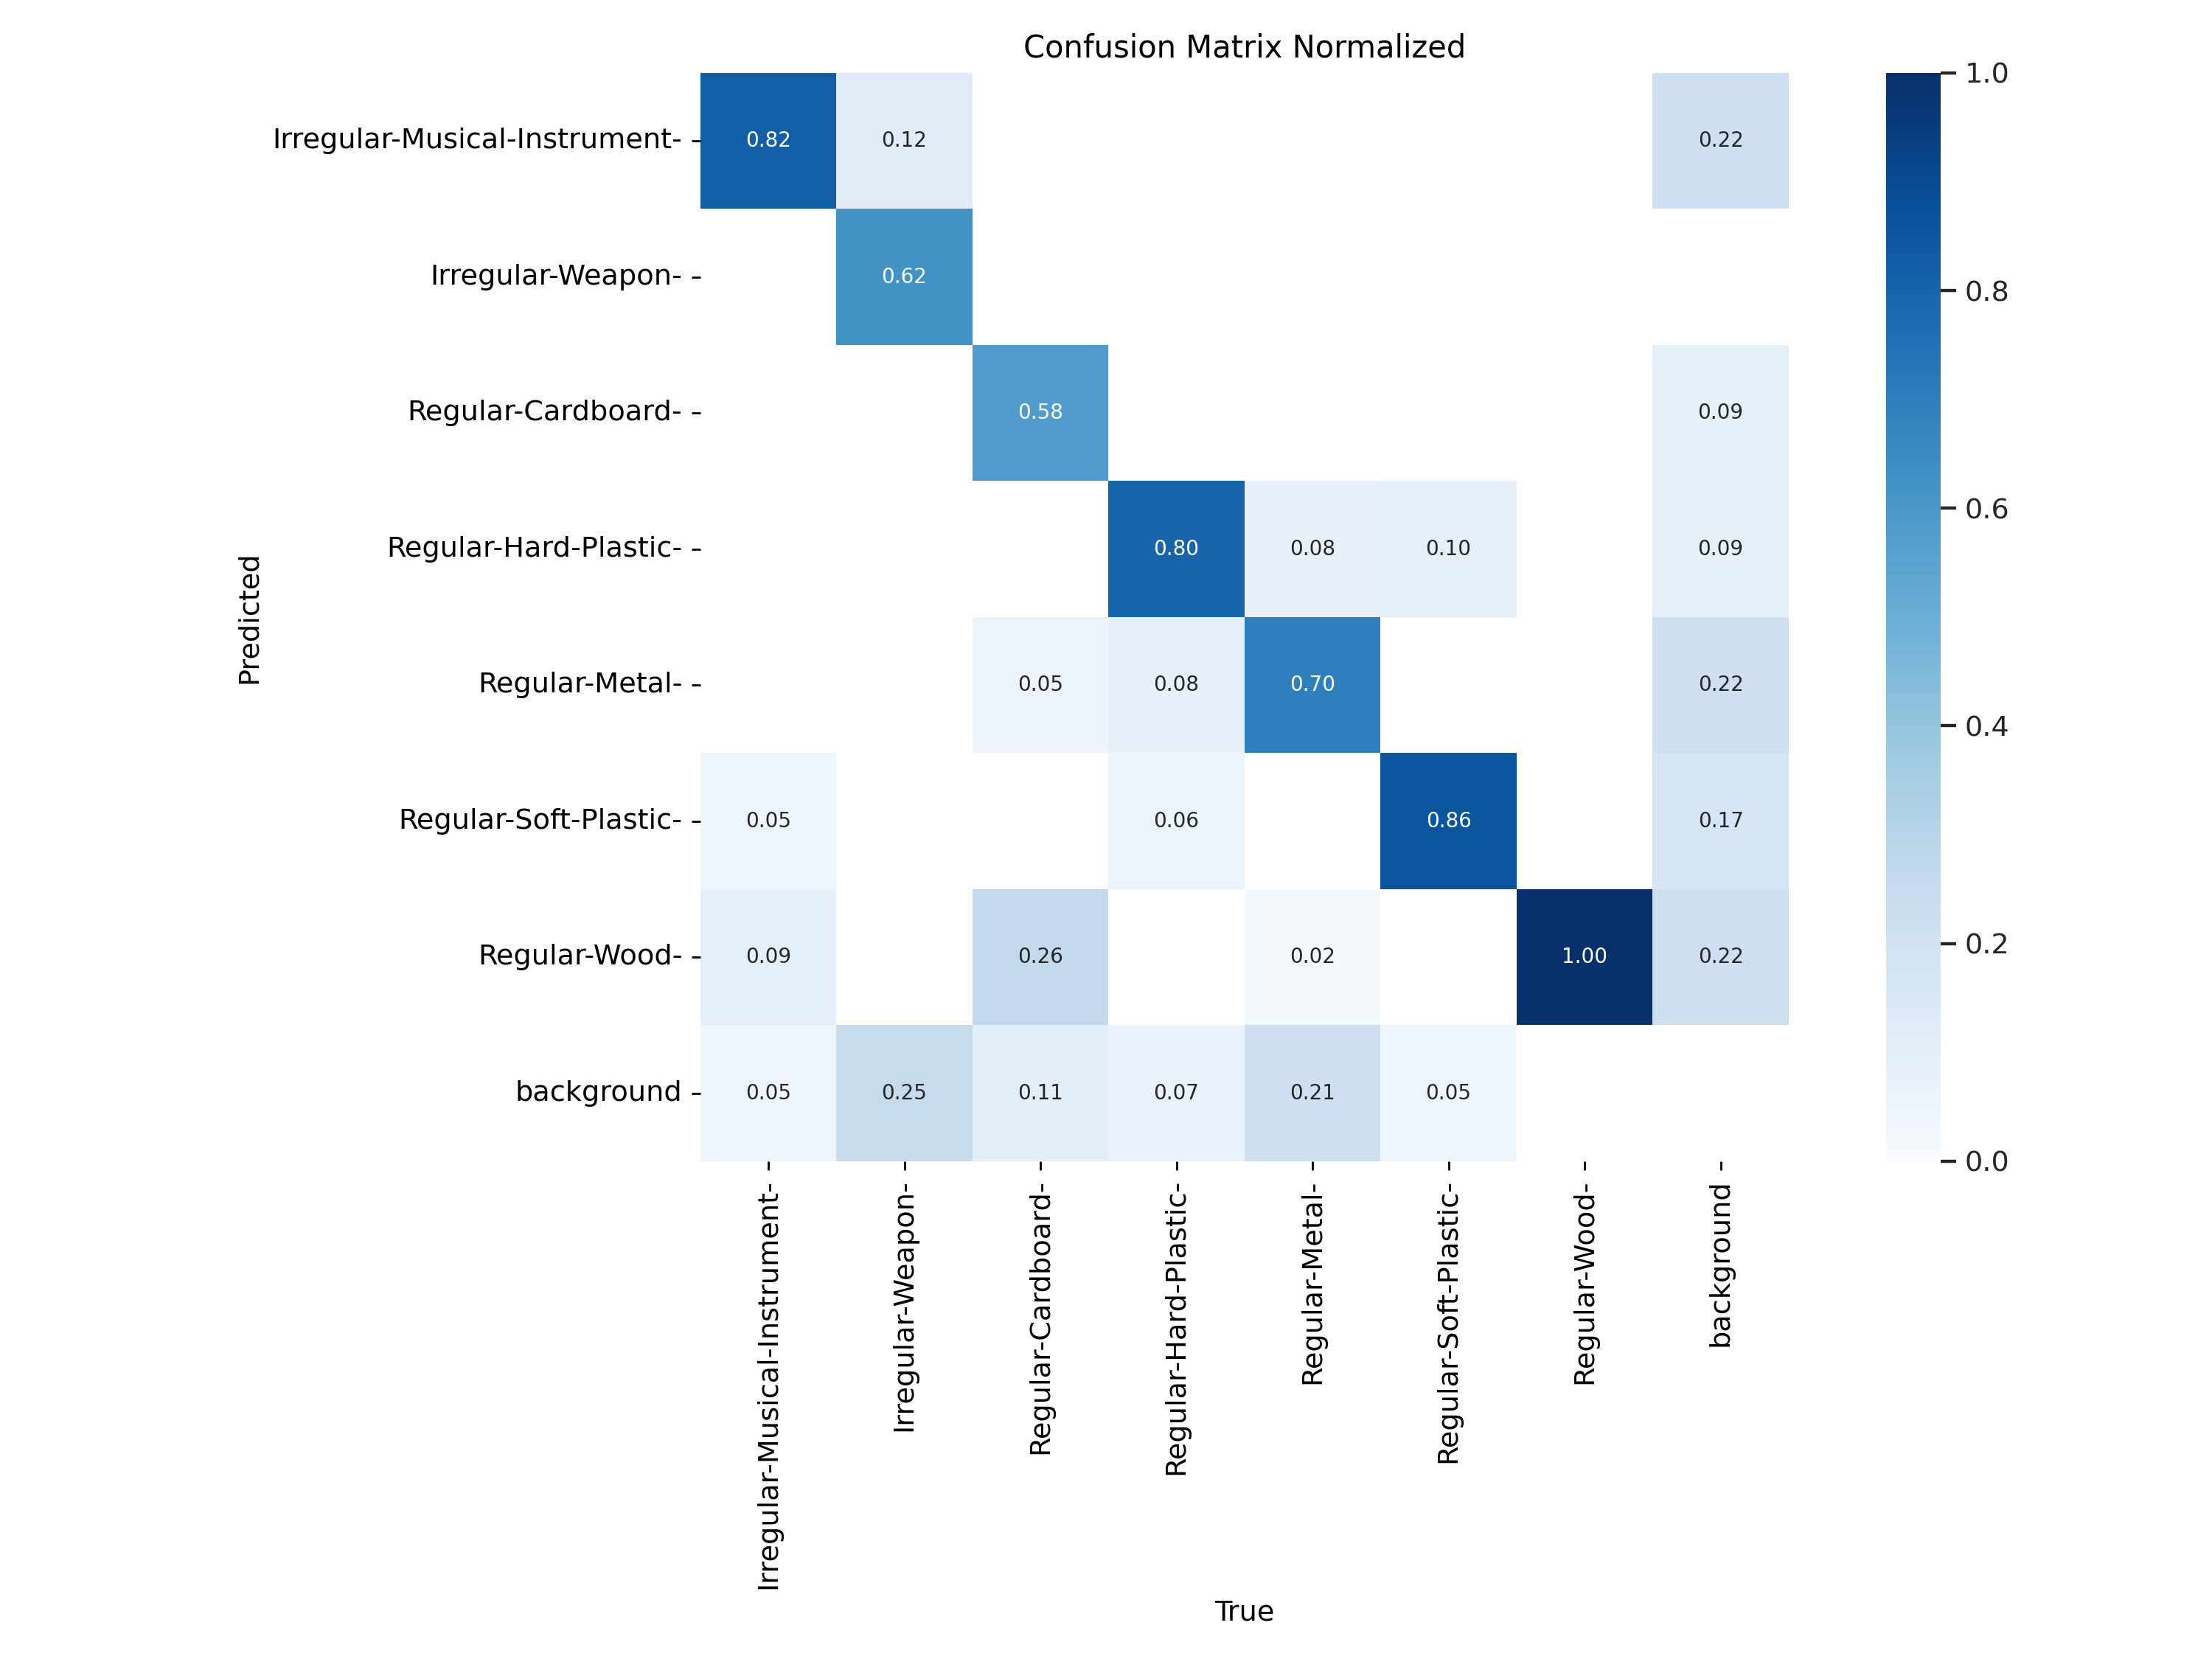

In [ ]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train2/confusion_matrix_normalized.png', width=600)

In [ ]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

from google.colab import files

!zip -r /content/runs.zip /content/runs

files.download("/content/runs.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 15%)
  adding: content/runs/detect/train2/P_curve.png (deflated 6%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 13%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 7%)
  adding: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 18%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 13%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 22%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 12%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 12%)
  adding: content/runs/detect/train2/val_batch0_pred.jpg (deflated 13%)
  adding: content/runs/detect/train2/R_curve.png (deflated 8%)
  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 12%)
  adding: content/run

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Size Estimation of Luggage

In [ ]:
def estimate_size(x1, y1, x2, y2):
    width = x2 - x1
    height = y2 - y1
    return width, height

def pixels_to_cm(width_pixels, height_pixels, pixel_to_cm_ratio):
    width_cm = width_pixels / pixel_to_cm_ratio
    height_cm = height_pixels / pixel_to_cm_ratio
    return width_cm, height_cm

In [27]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow 

def infer_and_estimate_size(image_path, model_path, pixel_to_cm_ratio):
    model = YOLO(model_path)
    results = model(image_path)
    detections = results[0].boxes 
    image = cv2.imread(image_path)
    img_height, img_width, _ = image.shape

    for detection in detections:
        x1, y1, x2, y2 = detection.xyxy[0] 
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  
        width_pixels, height_pixels = estimate_size(x1, y1, x2, y2)
        width_cm, height_cm = pixels_to_cm(width_pixels, height_pixels, pixel_to_cm_ratio)
        class_id = detection.cls[0]
        class_name = model.names[int(class_id)]  
        confidence = round(detection.conf[0].item(), 2)
        box_color = (0, 0, 255)  
        cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 2)
        label_top = f'{class_name} {confidence}'
        label_size = cv2.getTextSize(label_top, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
        y_label_top = max(y1, label_size[1] + 10)  
        y_size_bottom = y_label_top + label_size[1] + 10  
        cv2.rectangle(image, (x1, y_label_top - label_size[1] - 10), (x1 + label_size[0], y_label_top + 5), box_color, -1)
        cv2.rectangle(image, (x1, y_size_bottom - label_size[1] - 10), (x1 + label_size[0], y_size_bottom + 5), box_color, -1)

        cv2.putText(image, label_top, (x1, y_label_top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2) 
        size_label = f'Size: {width_cm:.2f}cm x {height_cm:.2f}cm'
        cv2.putText(image, size_label, (x1, y_size_bottom), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)  

    cv2_imshow(image)  


image 1/1 /content/luggage_test2.jpg: 480x640 9 Regular-Hard-Plastic-s, 2 Regular-Metal-s, 2 Regular-Soft-Plastic-s, 56.2ms
Speed: 2.7ms preprocess, 56.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


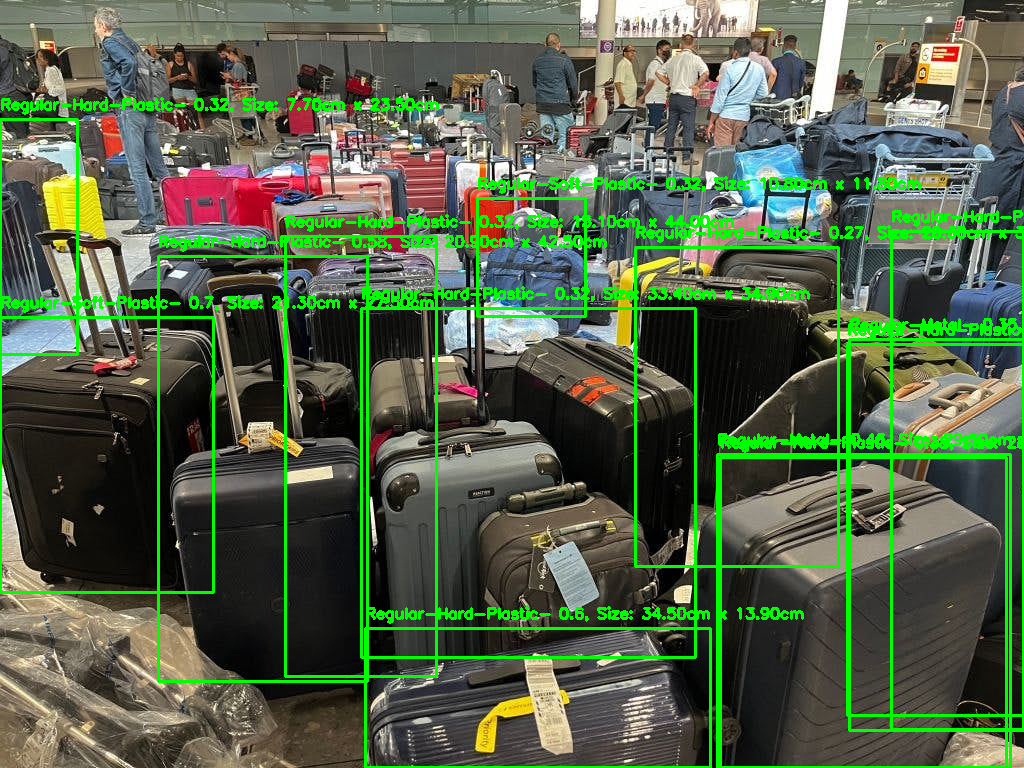

In [ ]:
infer_and_estimate_size('/content/luggage_test2.jpg', '/content/best.pt', pixel_to_cm_ratio=10)

# Train on YOLOv8m

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  
results = model.train(data='/content/luggage-detection-1/data.yaml', epochs=100)  
results = model.val()  

100%|██████████| 49.7M/49.7M [00:00<00:00, 475MB/s]


Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/luggage-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 106MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 46.7MB/s]


AMP: checks passed ✅


train: Scanning /content/luggage-detection-1/train/labels... 4053 images, 249 backgrounds, 0 corrupt: 100%|██████████| 4053/4053 [00:03<00:00, 1063.45it/s]


train: New cache created: /content/luggage-detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/luggage-detection-1/valid/labels... 169 images, 13 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<00:00, 946.27it/s]

val: New cache created: /content/luggage-detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.06G      1.322      2.198      1.645         18        640: 100%|██████████| 254/254 [01:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        169        253      0.344      0.413      0.334      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.12G      1.406      2.015      1.693         18        640: 100%|██████████| 254/254 [01:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all        169        253      0.359      0.344       0.19     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.12G       1.38       1.95      1.671         15        640: 100%|██████████| 254/254 [01:17<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all        169        253      0.366      0.401      0.363      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       7.1G      1.343      1.865      1.646         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        169        253      0.519      0.407      0.423      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.08G      1.262      1.731      1.583         28        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        169        253      0.532      0.574      0.542      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       7.1G      1.236      1.633      1.558         38        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        169        253      0.651      0.484      0.579      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.08G      1.214      1.594      1.543         16        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        169        253      0.509      0.571      0.526      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.11G       1.19      1.535      1.521         20        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.613      0.586      0.607      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.09G      1.157      1.465      1.496         28        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        169        253       0.48      0.519      0.447      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.14G      1.131      1.411      1.473         25        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all        169        253      0.534      0.687      0.617      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       7.1G       1.12      1.395      1.468         24        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        169        253      0.594       0.66      0.653      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.12G      1.108      1.353      1.455         20        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        169        253      0.602      0.635      0.645       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.08G      1.086      1.301      1.435         25        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        169        253      0.704      0.652      0.688      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.15G      1.091      1.282      1.437         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        169        253      0.599      0.695      0.662      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.11G      1.074      1.253      1.426         16        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        169        253      0.631       0.67      0.663      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.13G      1.073      1.217      1.424         17        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.619      0.648      0.661      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.08G      1.051      1.197      1.411         11        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all        169        253      0.697      0.667      0.704      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.12G      1.043      1.192      1.404         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.672       0.66      0.651      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.08G      1.034       1.15      1.392         30        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.736      0.624      0.665      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.13G      1.026      1.137      1.393         24        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.688      0.617      0.669      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       7.1G       1.02      1.117      1.384         25        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.728      0.694      0.761      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.11G      1.007      1.097      1.374         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.728      0.691      0.687      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.1G       1.01      1.074      1.374         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.767      0.682      0.734      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       7.1G     0.9929      1.047      1.358         31        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        169        253        0.8      0.651      0.778      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.08G     0.9909      1.037      1.355         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.673      0.634      0.668      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.11G     0.9873      1.032      1.355         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.814      0.621      0.718      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       7.1G     0.9783      1.019      1.349         33        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        169        253      0.761      0.665      0.739      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.12G      0.969          1      1.339         29        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.651      0.719        0.7      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.07G     0.9584     0.9715      1.333         12        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.668      0.715      0.742      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.11G     0.9494     0.9807      1.327         13        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.773      0.648      0.752      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       7.1G     0.9584      0.965      1.335         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.677      0.699      0.689      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.19G     0.9471     0.9434      1.328         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.709       0.69      0.717      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       7.1G     0.9269     0.9238       1.31         27        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.652      0.708      0.711      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.13G     0.9231     0.9172      1.307         21        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.779      0.602        0.7      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.12G     0.9224     0.9064      1.309         13        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.734      0.653      0.727        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.13G     0.9229     0.8947      1.303         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.638      0.726      0.695      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.11G     0.9127       0.89      1.301         24        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.678      0.752      0.743      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.11G     0.9134     0.8709      1.296         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.784      0.666      0.749      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.11G     0.9095     0.8712      1.301         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.722      0.749      0.767      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.12G      0.899      0.854      1.294         17        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        169        253      0.686      0.727      0.743       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       7.1G     0.8944     0.8548      1.287         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.612      0.783      0.718      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.14G     0.8877     0.8378      1.281         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.613      0.672      0.662      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.08G     0.8839     0.8367      1.276         21        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        169        253      0.753      0.715      0.764      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.15G     0.8894     0.8429      1.281         17        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.733      0.747      0.781      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.11G     0.8674     0.8058      1.267         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.775      0.737      0.758       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.12G     0.8552     0.8073      1.263         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        169        253      0.803      0.747       0.79      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.09G     0.8522     0.7909      1.255         15        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.759        0.7      0.714      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       7.1G     0.8625     0.7888       1.26         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.777      0.639      0.709      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.07G     0.8497     0.7867      1.253         20        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.765      0.685      0.743      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.13G     0.8368     0.7711      1.246         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.817        0.7      0.768      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.09G     0.8312     0.7684      1.242         32        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.756        0.7      0.717      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.09G       0.84     0.7661      1.245         25        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        169        253       0.85      0.661      0.758      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.08G     0.8338     0.7682      1.247         16        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.773      0.651      0.712      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.13G     0.8203     0.7427      1.234         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.666       0.73      0.739      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.08G      0.809      0.742      1.225         17        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.775      0.714      0.765      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.11G     0.7916     0.7231      1.218         12        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.713      0.774      0.782      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.13G     0.7997      0.711       1.22         24        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.803      0.674      0.733      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.11G     0.8012     0.7206      1.222         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.725       0.73      0.731      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.08G     0.7955     0.7154      1.217         28        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.815      0.693      0.758      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.14G     0.7956     0.7109      1.219         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.812      0.688      0.729      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.07G      0.788     0.7148      1.218         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.771      0.762      0.808      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.09G     0.7653      0.688        1.2         24        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.777      0.812      0.824      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.09G     0.7662     0.6723      1.197         17        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        169        253      0.766      0.734      0.765      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.15G     0.7622     0.6722      1.191         20        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.755      0.774       0.78      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.17G      0.764     0.6865      1.197         16        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.829      0.735      0.783      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       7.2G     0.7554     0.6633       1.19          6        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.724      0.749       0.74      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.11G     0.7403     0.6596      1.184         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.822      0.684      0.773      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.12G     0.7422     0.6606      1.182         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.724      0.774      0.773      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.09G     0.7298     0.6444      1.171         14        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        169        253      0.831      0.692      0.739       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.13G     0.7307     0.6422      1.173         26        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.814      0.689       0.79      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.07G     0.7231     0.6357      1.169         16        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        169        253      0.716      0.774      0.783      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.11G     0.7259     0.6377      1.172         14        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.746      0.729      0.763      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       7.1G     0.7199     0.6378      1.165         27        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.808      0.662      0.747      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.14G      0.704     0.6245      1.158         20        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.789      0.707      0.749      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.08G     0.7039     0.6109      1.156         24        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.779      0.712      0.787      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.14G     0.6953     0.6113      1.151         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.811      0.751      0.787      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       7.1G     0.7027     0.6127      1.155         31        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.778      0.705      0.776      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.11G     0.6996     0.6124      1.154         21        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.811      0.673      0.755      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.09G      0.694     0.6033      1.151         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        169        253      0.756      0.731      0.757      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.1G      0.684     0.5945      1.147         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.761      0.726      0.743      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.08G     0.6759     0.5869       1.14         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all        169        253      0.796      0.715      0.754      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.11G     0.6825     0.6012      1.144         26        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.753      0.764      0.771      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       7.1G     0.6692      0.578      1.139         23        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.822      0.734       0.78      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.15G     0.6652     0.5768       1.13         30        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.765      0.779      0.771      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.09G     0.6563     0.5618      1.128         17        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        169        253      0.775      0.756      0.787      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.11G     0.6552     0.5701      1.129         15        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.816      0.685      0.755      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.08G     0.6522     0.5653      1.127         19        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.788       0.74      0.768      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.11G     0.6457     0.5626       1.12         35        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.854      0.721      0.777      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.11G      0.647     0.5563      1.121         22        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        169        253      0.813      0.722      0.772      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.11G     0.6409     0.5592      1.116         18        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.786      0.702      0.735      0.509


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.06G     0.4861     0.3094      1.048         10        640: 100%|██████████| 254/254 [01:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all        169        253      0.797      0.765      0.748      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       7.1G     0.4718     0.2842      1.039         10        640: 100%|██████████| 254/254 [01:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.819       0.74      0.764      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.08G     0.4644     0.2801      1.033          7        640: 100%|██████████| 254/254 [01:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        169        253      0.833      0.718      0.758      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.09G     0.4538     0.2805      1.025         10        640: 100%|██████████| 254/254 [01:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253       0.77      0.742      0.757      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.16G     0.4488     0.2683      1.022          6        640: 100%|██████████| 254/254 [01:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        169        253      0.799      0.727      0.752      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.08G     0.4357     0.2627      1.009          4        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253      0.789      0.738      0.758      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.09G     0.4306     0.2605      1.004          5        640: 100%|██████████| 254/254 [01:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        169        253      0.784       0.74       0.76      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       7.1G     0.4267     0.2546      1.004          5        640: 100%|██████████| 254/254 [01:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        169        253      0.791       0.74      0.757      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.06G      0.422     0.2591          1          5        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        169        253      0.774      0.748      0.762      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.11G     0.4206      0.257      1.002          5        640: 100%|██████████| 254/254 [01:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        169        253       0.78      0.751      0.761      0.539



100 epochs completed in 2.226 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]


                   all        169        253      0.778      0.811      0.824      0.583
Irregular-Musical-Instrument-         17         22      0.652      0.727      0.781      0.561
     Irregular-Weapon-          8          8          1      0.713       0.87      0.616
    Regular-Cardboard-          9         19      0.884      0.801      0.902      0.617
 Regular-Hard-Plastic-         45         90      0.756      0.856      0.759      0.579
        Regular-Metal-         35         53      0.708      0.736       0.72      0.493
 Regular-Soft-Plastic-         26         42      0.791        0.9      0.841      0.629
         Regular-Wood-         17         19      0.653      0.947      0.895      0.589
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 

val: Scanning /content/luggage-detection-1/valid/labels.cache... 169 images, 13 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.25it/s]


                   all        169        253      0.778      0.812      0.824      0.583
Irregular-Musical-Instrument-         17         22      0.652      0.727      0.781      0.556
     Irregular-Weapon-          8          8          1      0.713       0.87      0.617
    Regular-Cardboard-          9         19      0.884      0.802      0.902      0.617
 Regular-Hard-Plastic-         45         90      0.756      0.856      0.758      0.579
        Regular-Metal-         35         53      0.708      0.736      0.723      0.494
 Regular-Soft-Plastic-         26         42      0.791        0.9      0.841      0.628
         Regular-Wood-         17         19      0.654      0.947      0.895       0.59
Speed: 0.2ms preprocess, 11.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2


# Metrics Evaluation

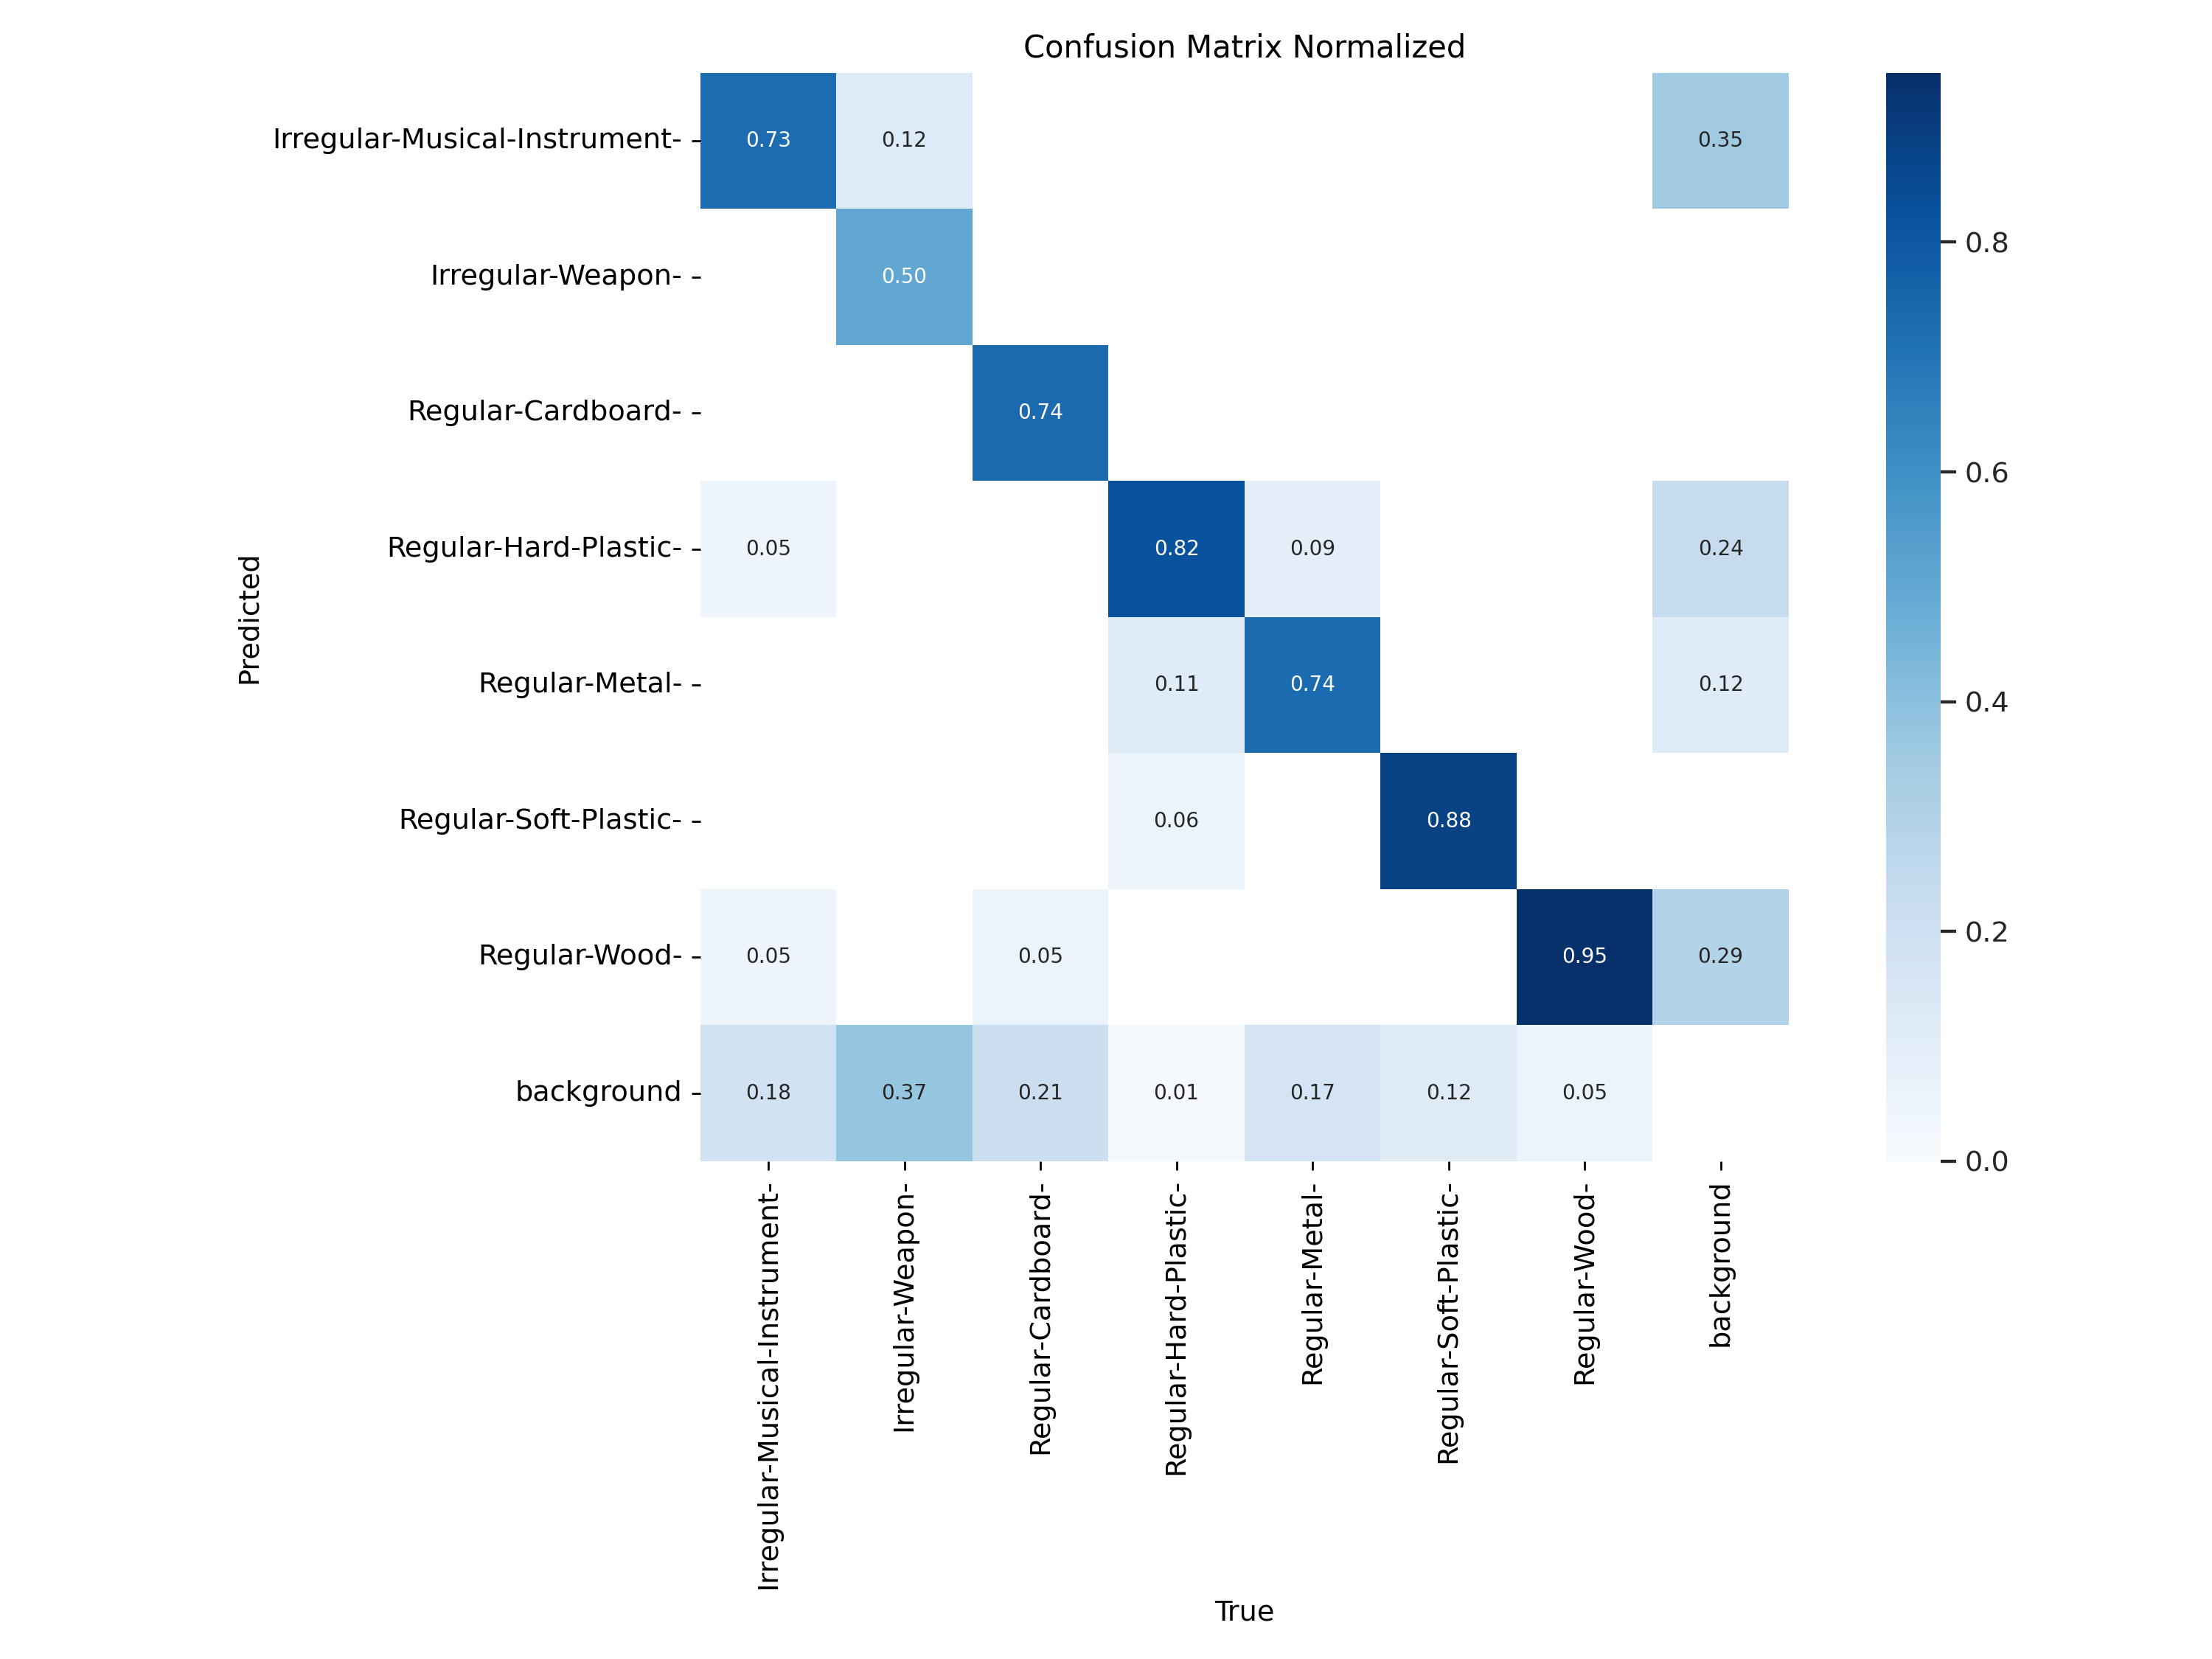

In [ ]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train2/confusion_matrix_normalized.png', width=600)

In [ ]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

from google.colab import files

!zip -r /content/runs.zip /content/runs

files.download("/content/runs.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 15%)
  adding: content/runs/detect/train2/P_curve.png (deflated 8%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 13%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 7%)
  adding: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 19%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 13%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 23%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 12%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 11%)
  adding: content/runs/detect/train2/val_batch0_pred.jpg (deflated 13%)
  adding: content/runs/detect/train2/R_curve.png (deflated 8%)
  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 12%)
  adding: content/run

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/test_luggage1.jpg: 416x640 1 Irregular-Musical-Instrument-, 2 Regular-Hard-Plastic-s, 2 Regular-Soft-Plastic-s, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


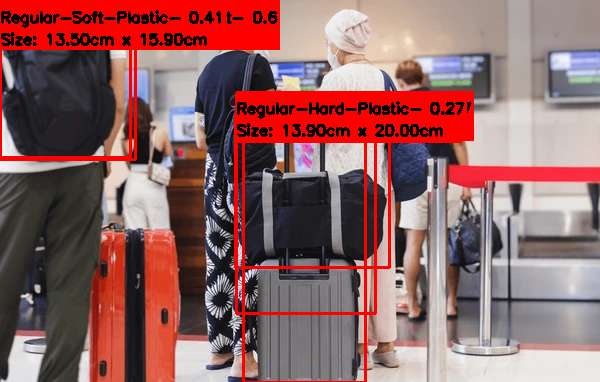

In [31]:
infer_and_estimate_size('/content/test_luggage1.jpg', '/content/runs/detect/train/weights/best.pt', pixel_to_cm_ratio=10)


image 1/1 /content/test_luggage1.jpg: 416x640 2 Irregular-Musical-Instrument-s, 1 Regular-Hard-Plastic-, 2 Regular-Soft-Plastic-s, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


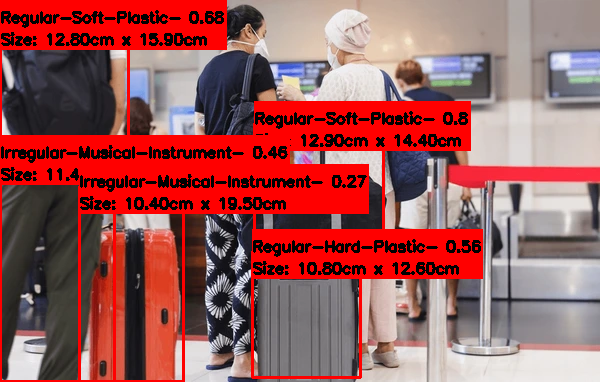

In [32]:
infer_and_estimate_size('/content/test_luggage1.jpg', '/content/best.pt', pixel_to_cm_ratio=10)